In this problem you will code a multiclass classifier to use the OvR method. For each 2-class problem, use a nearest-means classifier. You will apply this multiclass classifier separately to each of datasets 4, 5, 6 from Homework 1, as directed below.
This content is protected and may not be shared, uploaded, or distributed. p. 1 of 3
For the plots below, you may find it useful to use plotDecBoundaries code that was given with Homework 1. You may need to modify it somewhat for this problem.
For the decision rule that combines the results of the 2-class classifiers (“combining rule”), you will use 3 different methods, as follows.


IMPRTING NECESSARY LIBRARIES

In [2]:
import pandas as pd 

/var/folders/3t/_b6g8knj39g9p92hxh64xcfc0000gn/T/ipykernel_21930/217833862.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


LOAD THE TWO CLASS TESTING MODEL USING PANDAS

In [3]:
# Loading test model
dataset1_test = pd.read_csv("dataset4_test.csv")
dataset2_test = pd.read_csv("dataset5_test.csv")
dataset3_test = pd.read_csv("dataset6_test.csv")

testing_datasets = [dataset1_test, dataset2_test, dataset3_test]

FileNotFoundError: [Errno 2] No such file or directory: 'dataset4_test.csv'

LOAD THE THREE CLASS TRAINING MODEL USING PANDAS

In [ ]:
# Loading train model

dataset1_train = pd.read_csv("dataset4_train.csv")
dataset2_train = pd.read_csv("dataset5_train.csv")
dataset3_train = pd.read_csv("dataset6_train.csv")

training_datasets = [dataset1_train, dataset2_train, dataset3_train]

In [ ]:
dataset1_train.head

<bound method NDFrame.head of        X-axis    Y-axis  Class
0   -0.839139  3.202297    3.0
1   -1.147820 -0.842893    2.0
2    0.635721  1.823113    1.0
3    2.513194 -0.497300    1.0
4    1.859033 -0.032015    1.0
..        ...       ...    ...
145 -1.932373  2.604821    3.0
146  1.142094  0.599150    1.0
147  2.106134 -0.583444    1.0
148 -0.847253 -0.665505    2.0
149 -3.772173  1.241466    3.0

[150 rows x 3 columns]>

In [ ]:
dataset1_train.columns

Index(['X-axis', 'Y-axis', 'Class'], dtype='object')

In [ ]:
def get_features(df):
    # Assuming the last column is the class/label and the rest are features
    labels = df.iloc[:, -1].values
    features = df.iloc[:, :-1].values
    return features, labels


In [ ]:
import numpy as np

def calc_mean(features, labels):
    # Identify unique labels
    unique_labels = np.unique(labels)
    num_features = features.shape[1]
    mean_arr = np.zeros((len(unique_labels), num_features))

    for i, label in enumerate(unique_labels):
        # Filter features by the current label
        filtered_features = features[labels == label]

        # Calculate mean for each feature dimension
        for j in range(num_features):
            mean_arr[i, j] = np.mean(filtered_features[:, j])

    return mean_arr


In [ ]:
x, y = get_features(dataset1_train) 
#print mean 
print(calc_mean(x, y))

[[ 1.18364448  0.79225357]
 [-1.09023208 -1.00148188]
 [-1.85341506  1.82366056]]


In [ ]:
from plotDecBoundaries import plotDecBoundaries


(a) Use the default decision rule we gave in Lecture 3 for OvR method, leaving points in indeterminate regions as unclassified.
Plot the training points, decision regions and boundaries, for each 2-class (binary) classifier (3 plots for each dataset).
Plot the final decision boundary and regions for the 3-class problem (1 plot for each dataset).
Report the training classification accuracy, error rate, and unclassified rate, on the training set and separately on the test set (18 numbers total): report them in a table: columns labeled “accuracy”, “error”, “unclassified”; and rows labeled “dataset_4 train”, “dataset_4 test”, “dataset_5 train”, “dataset_5 test”, “dataset_6 train”, “dataset_6 test”.


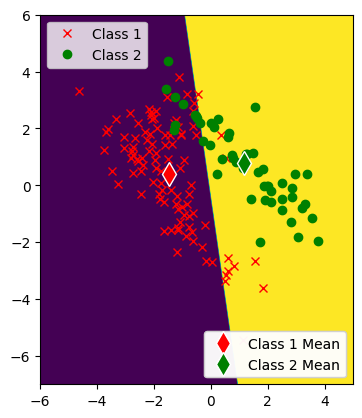

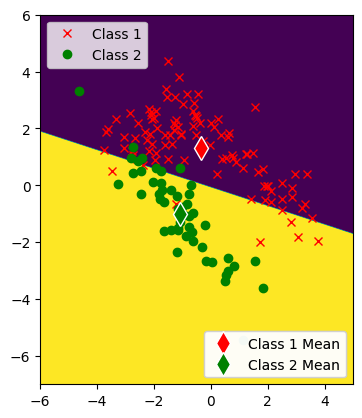

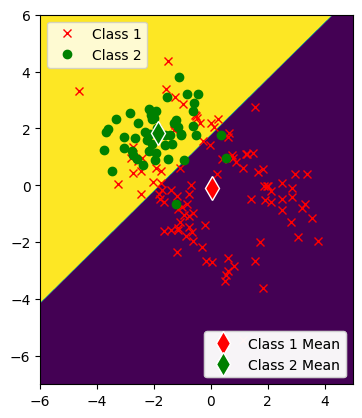

In [ ]:
train_set = dataset1_train
train_features, train_labels = get_features(train_set)

unique_labels = np.unique(train_labels)
means = []

for label in unique_labels:
    # Create binary labels: 1 for the current class, 0 for all other classes
    binary_train_labels = (train_labels == label).astype(int) + 1

    # Compute the mean feature vector for the binary class
    mean = calc_mean(train_features,binary_train_labels)
    means.append(mean)
    plotDecBoundaries(train_features,binary_train_labels,mean)

In [ ]:
means

[array([[-1.47182357,  0.41108934],
        [ 1.18364448,  0.79225357]]),
 array([[-0.33488529,  1.30795706],
        [-1.09023208, -1.00148188]]),
 array([[ 0.0467062 , -0.10461416],
        [-1.85341506,  1.82366056]])]

In [ ]:
binary_train_labels

array([2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2])

In [ ]:
def OVRClassifier1(train_set):
    # Extract features and labels using get_features
    train_features, train_labels = get_features(train_set)

    unique_labels = np.unique(train_labels)
    means = []
    binary_labels = []

    for label in unique_labels:
        # Create binary labels: 1 for the current class, 0 for all other classes
        binary_train_labels = (train_labels == label).astype(int) + 1

        # Compute the mean feature vector for the binary class
        mean = calc_mean(train_features,binary_train_labels)
        means.append(mean)
        binary_labels.append(binary_train_labels)
        plt.title(f'Decison Boundary and Regions for Dataset {i+1}')

        plotDecBoundaries(train_features,binary_train_labels,mean)
    return means, binary_train_labels

In [ ]:
import numpy as np

def calculate_metrics_ovr(labels, predictions):
 
   # Ensure labels and predictions are numpy arrays for element-wise comparison
    labels = np.array(labels)
    predictions = np.array(predictions)
    correct = np.sum((predictions == labels) & (predictions != -1))
    unclassified = np.sum(predictions == -1)
    incorrect = len(labels) - correct - unclassified
    accuracy = correct / len(labels) * 100
    error_rate = incorrect / len(labels) * 100
    unclassified_rate = unclassified / len(labels) * 100
    return accuracy, error_rate, unclassified_rate


In [ ]:
def predict_ovr(features, trained_means):
    predictions = []
    for sample in features:
        # Calculate distances to each class mean
        distances = [np.linalg.norm(sample - class_mean) for class_mean in trained_means]
        # Pick the closest mean and assign its label as the prediction
        predicted_label = np.argmin(distances) + 1  # Adding 1 because labels are 1-indexed
        predictions.append(predicted_label)
    return predictions


BINARY CLASSIFICATION FOR TRIANING DATASET

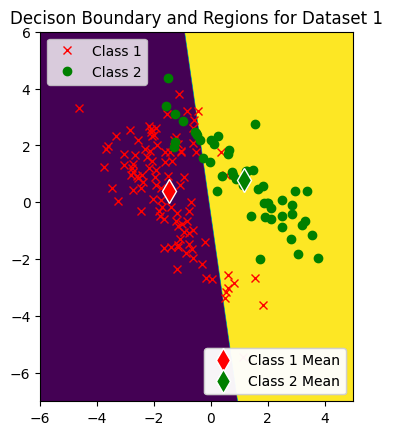

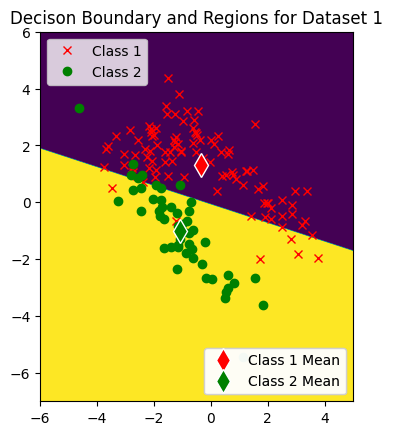

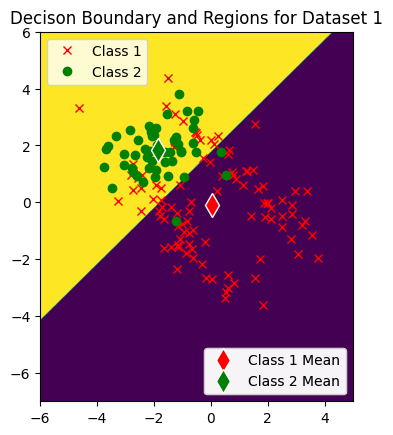

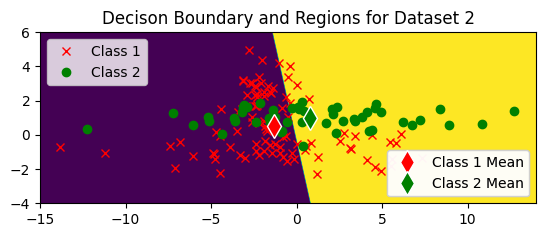

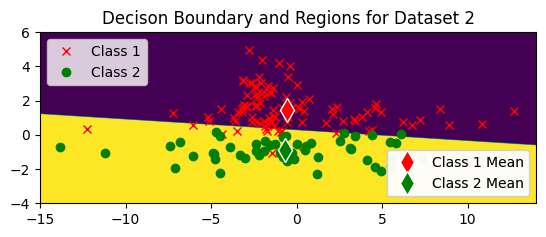

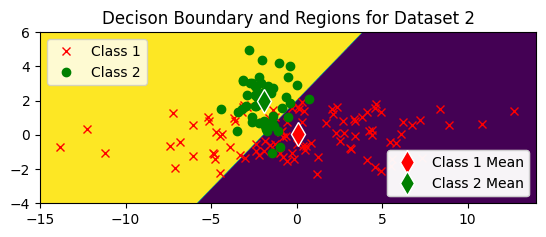

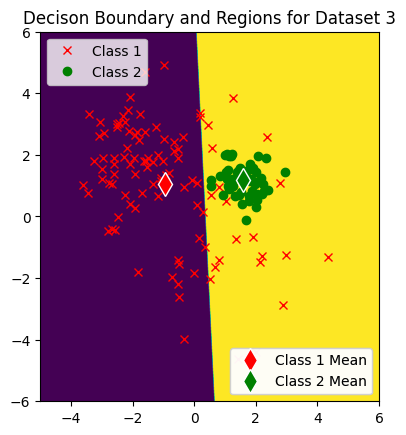

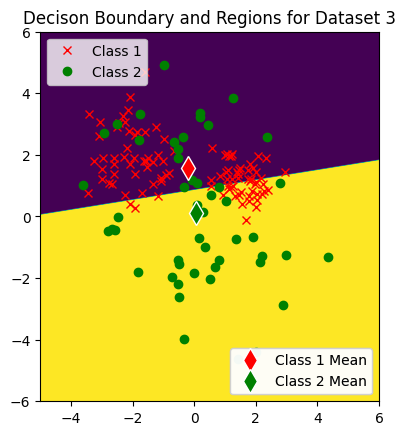

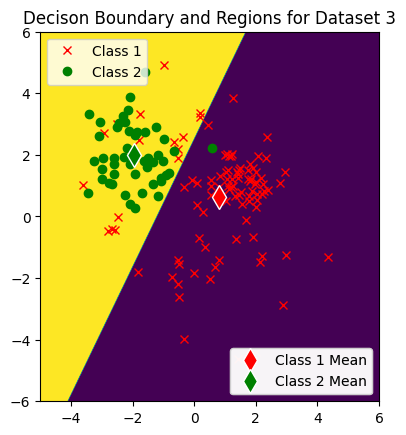

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 85.33% 	 14.67% 	 0.00%
Dataset 5 train 	 62.00% 	 38.00% 	 0.00%
Dataset 6 train 	 68.67% 	 31.33% 	 0.00%


In [ ]:
allmeans = []
allbinary = []
train_metrics_list = []
for i in range(3):
    means, binary_train_labels = OVRClassifier1(training_datasets[i])
    allmeans.append(means)
    allbinary.append(binary_train_labels)

for i in range(3):
    # Training set metrics
    train_features, train_labels = get_features(training_datasets[i])
    train_predictions = predict_ovr(train_features, allmeans[i])
    train_accuracy, train_error_rate, train_unclassified_rate = calculate_metrics_ovr(train_labels, train_predictions)
    train_metrics_list.append((train_accuracy, train_error_rate, train_unclassified_rate))
print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i in range(3):
    print(f"Dataset {i+4} train", "\t", f"{train_metrics_list[i][0]:.2f}%", "\t", f"{train_metrics_list[i][1]:.2f}%", "\t", f"{train_metrics_list[i][2]:.2f}%")

In [ ]:
training_datasets[1]

,X-axis,Y-axis,Class
0,0.009869,2.912476,3.0
1,-2.393117,1.690808,3.0
2,-2.450009,1.709275,3.0
3,-4.395520,1.511778,3.0
4,2.685565,0.785240,1.0
...,...,...,...
145,-4.831828,-1.123897,2.0
146,2.111756,1.239606,1.0
147,-1.838676,0.500294,3.0
148,-1.250272,-0.519813,2.0


In [ ]:
allmeans

[[array([[-1.47182357,  0.41108934],
         [ 1.18364448,  0.79225357]]),
  array([[-0.33488529,  1.30795706],
         [-1.09023208, -1.00148188]]),
  array([[ 0.0467062 , -0.10461416],
         [-1.85341506,  1.82366056]])],
 [array([[-1.31247616,  0.5249027 ],
         [ 0.80953245,  0.99867001]]),
  array([[-0.55520177,  1.48029927],
         [-0.70501633, -0.91212312]]),
  array([[ 0.05225806,  0.04327344],
         [-1.91993599,  1.96192853]])],
 [array([[-0.95756116,  1.04646157],
         [ 1.58608409,  1.1710504 ]]),
  array([[-0.18838179,  1.57632629],
         [ 0.04772534,  0.11132097]]),
  array([[ 0.81690472,  0.64118568],
         [-1.96284767,  1.98160218]])]]

In [ ]:
import numpy as np

def calculate_metrics_ovr(labels, predictions):
 
   # Ensure labels and predictions are numpy arrays for element-wise comparison
    labels = np.array(labels)
    predictions = np.array(predictions)
    correct = np.sum((predictions == labels) & (predictions != -1))
    unclassified = np.sum(predictions == -1)
    incorrect = len(labels) - correct - unclassified
    accuracy = correct / len(labels) * 100
    error_rate = incorrect / len(labels) * 100
    unclassified_rate = unclassified / len(labels) * 100
    return accuracy, error_rate, unclassified_rate


In [ ]:
def OVRClassifier2(test_set,ik):
    # Extract features and labels using get_features
    test_features, test_labels = get_features(test_set)

    unique_labels = np.unique(test_labels)
    means = []
    binary_labels = []
    i=0

    for label in unique_labels:
        # Create binary labels: 1 for the current class, 0 for all other classes
        binary_test_labels = (test_labels == label).astype(int) + 1
        binary_labels.append(binary_test_labels)
        plt.title(f'Decison Boundary and Regions for Dataset {i+1}')

        plotDecBoundaries(test_features,binary_test_labels,allmeans[ik][i])
        i+=1
    return means, binary_test_labels

BINARY CLASSIFICATION OF TESTIING DATASET

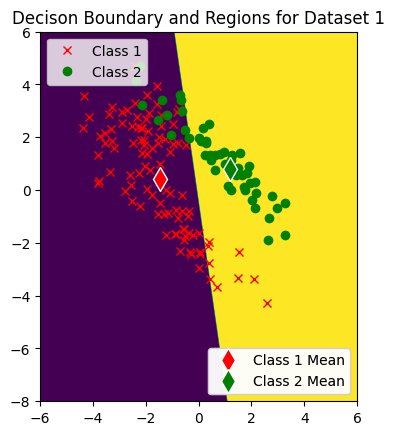

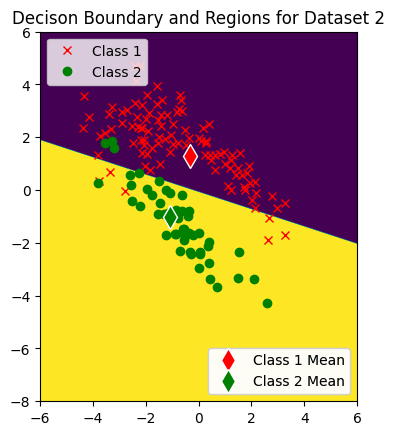

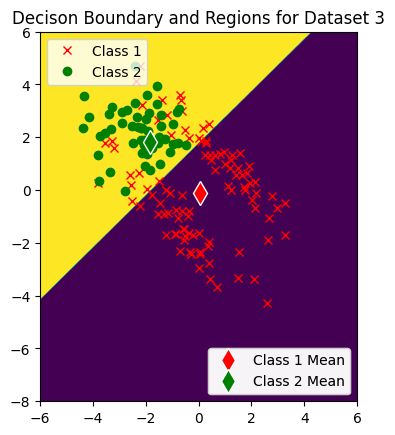

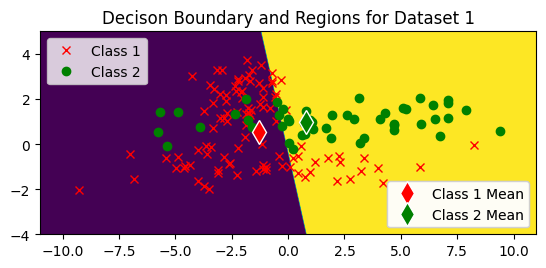

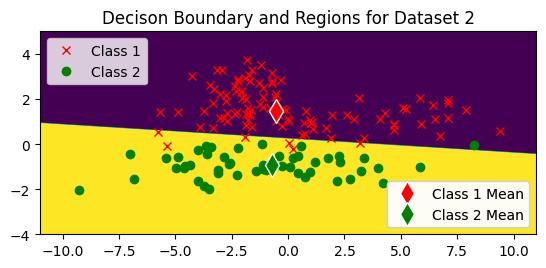

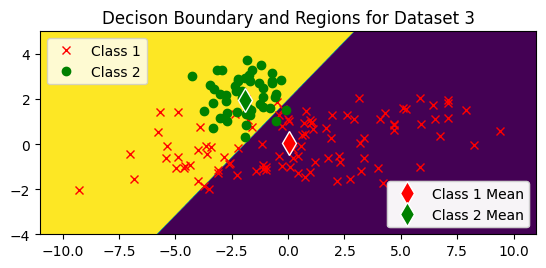

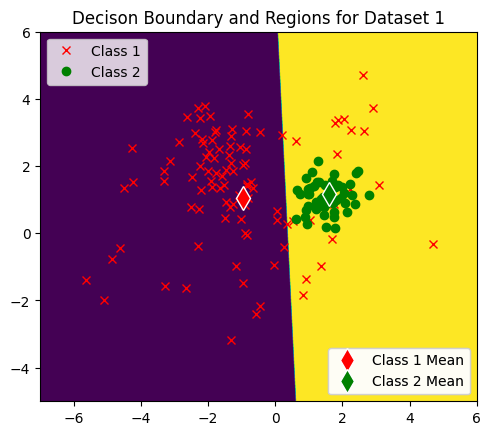

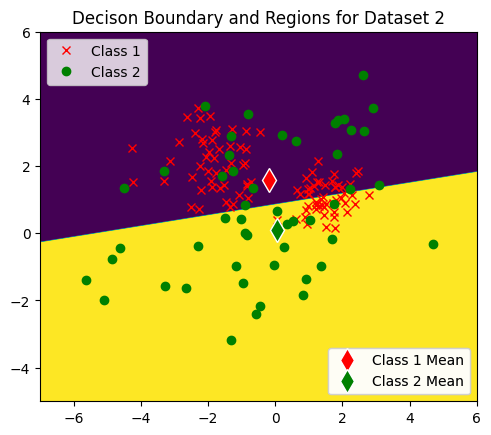

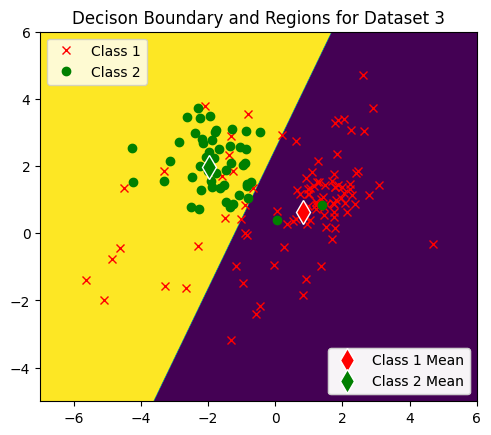

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 87.33% 	 12.67% 	 0.00%
Dataset 5 test 	 75.33% 	 24.67% 	 0.00%
Dataset 6 test 	 56.00% 	 44.00% 	 0.00%


In [ ]:
test_metrics_list = []
for i in range(3):
    means, binary_test_labels = OVRClassifier2(testing_datasets[i],i)
for i in range(3):
    test_features, test_labels = get_features(testing_datasets[i])
    test_predictions = predict_ovr(test_features, allmeans[i])
    test_accuracy, test_error_rate, test_unclassified_rate = calculate_metrics_ovr(test_labels, test_predictions)
    test_metrics_list.append((test_accuracy, test_error_rate, test_unclassified_rate))
print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i in range(3):
    print(f"Dataset {i+4} test", "\t", f"{test_metrics_list[i][0]:.2f}%", "\t", f"{test_metrics_list[i][1]:.2f}%", "\t", f"{test_metrics_list[i][2]:.2f}%")



FINAL DECISION BOUNDRY FOR TRAIN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations


def calculate_centroids(features, labels):
    unique_labels = np.unique(labels)
    centroids = {label: features[labels == label].mean(axis=0) for label in unique_labels}
    return centroids

def plot_line_between_centroids(p1, p2):
    # Calculate coefficients (A,B,C) for line equation Ax + By = C
    A = p2[1] - p1[1]
    B = p1[0] - p2[0]
    C = A * p1[0] + B * p1[1]
    return A, B, -C

def plot_decision_boundary_3class(features, labels):
    centroids = calculate_centroids(features, labels)
    unique_labels = np.unique(labels)
    
    plt.figure(figsize=(8, 6))
    
    for label in unique_labels:
        class_points = features[labels == label]
        plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Class {label}')
    
    # Plot centroids
    for label, centroid in centroids.items():
        plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=100, lw=2)
    
    # Plot decision boundaries
    for (label1, centroid1), (label2, centroid2) in combinations(centroids.items(), 2):
        A, B, C = plot_line_between_centroids(centroid1, centroid2)
        # Calculate intersection points with plot boundaries
        x_values = np.array([features[:, 0].min() - 1, features[:, 0].max() + 1])
        y_values = (C - A * x_values) / B
        plt.plot(x_values, y_values, linestyle='--')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries and Means')
    plt.legend()
    plt.grid(True)
    plt.xlim(features[:, 0].min() - 1, features[:, 0].max() + 1)
    plt.ylim(features[:, 1].min() - 1, features[:, 1].max() + 1)
    plt.show()



In [ ]:
def calculate_bisector(c1, c2):
    # Assuming c1 and c2 are centroids, calculate the perpendicular bisector
    A = c2[1] - c1[1]
    B = c1[0] - c2[0]
    C = c2[0]*c1[1] - c1[0]*c2[1]
    return A, B, C


In [ ]:
def classify_points_ovr(features, centroids):
    num_points = len(features)
    num_classes = len(centroids)
    truth_table = np.zeros((num_points, num_classes), dtype=bool)
    
    centroids_list = list(centroids.items())

    # Calculate "class side" for each point against all class-vs-rest comparisons
    for point_index, point in enumerate(features):
        for class_index, (class_label, centroid) in enumerate(centroids_list):
            is_class_side = True
            for other_label, other_centroid in centroids.items():
                if other_label == class_label:
                    continue
                A, B, C = calculate_bisector(centroid, other_centroid)
                side = A * point[0] + B * point[1] + C
                if side < 0:  # If point is not on the expected side
                    is_class_side = False
                    break
            truth_table[point_index, class_index] = is_class_side

    # Determine classifications based on the truth table
    predictions = []
    for i, row in enumerate(truth_table):
        if np.sum(row) == 1:
            predictions.append(np.where(row)[0][0])  # Classified to the unique class
        else:
            predictions.append(-1)  # Unclassified

    return np.array(predictions)

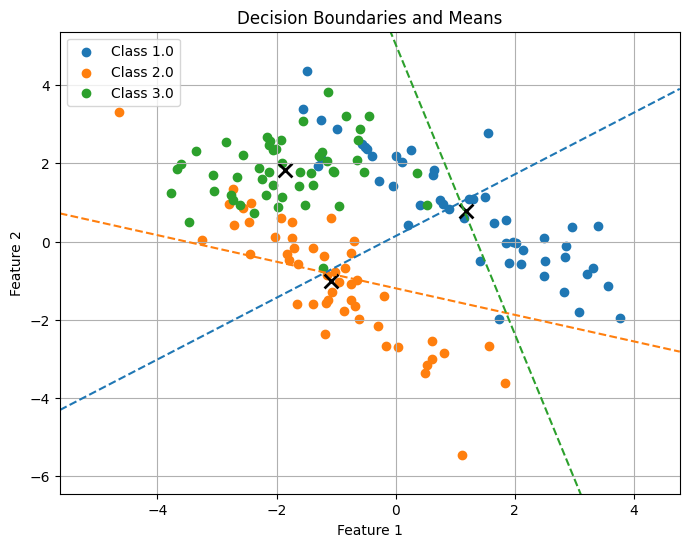

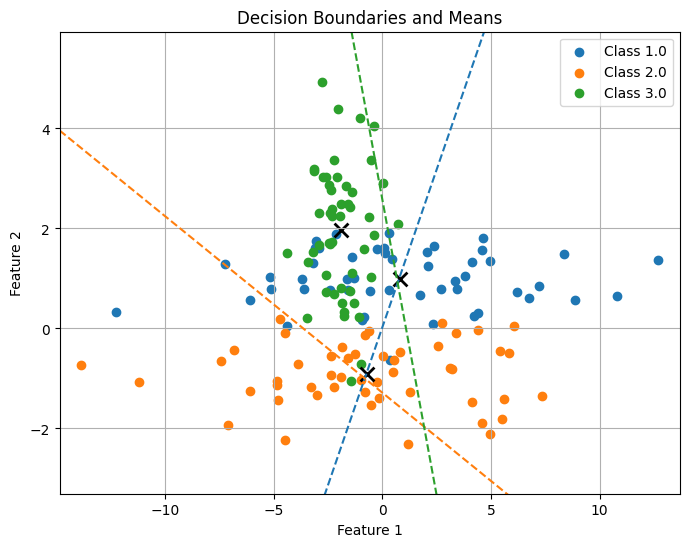

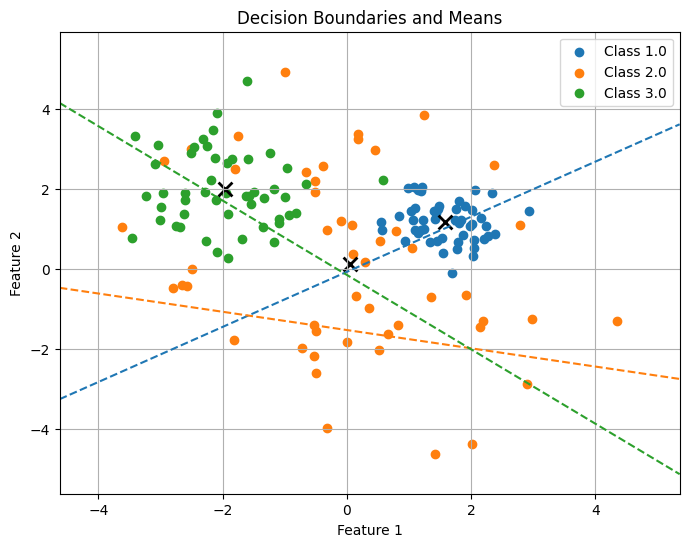

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 32.00% 	 58.67% 	 9.33%
Dataset 5 train 	 32.00% 	 60.67% 	 7.33%
Dataset 6 train 	 30.00% 	 55.33% 	 14.67%


In [ ]:
train_metrics_list = []
center=[]
for dataset in training_datasets:
    features, labels = get_features(dataset)
    
    # Plotting decision boundaries based on training data
    plot_decision_boundary_3class(features, labels)

    # Assuming calculate_centroids gives us the model for prediction
    centroids = calculate_centroids(features, labels)
    center.append(centroids)

    predictions = classify_points_ovr(features, centroids)

    # Calculate metrics (ensure you have appropriate labels for comparison, here assumed as 'labels')
    accuracy, error_rate, unclassified_rate = calculate_metrics_ovr(labels, predictions)
    train_metrics_list.append((accuracy, error_rate, unclassified_rate))

print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i, metrics in enumerate(train_metrics_list, start=4):
    print(f"Dataset {i} train", "\t", f"{metrics[0]:.2f}%", "\t", f"{metrics[1]:.2f}%", "\t", f"{metrics[2]:.2f}%")


In [ ]:
predictions

array([ 2,  0,  0,  1,  2,  2,  1,  0,  0,  0,  1,  1, -1,  2,  2,  2,  1,
        2,  2,  0,  1,  0,  1,  2,  0,  1, -1,  1,  2, -1,  0,  0, -1,  0,
        0,  2,  0,  0,  1, -1,  1,  1,  2,  0,  2, -1, -1,  0, -1,  0,  2,
        1,  1, -1,  0,  0, -1,  1,  1,  0,  2,  0,  2,  0,  0,  0,  2,  0,
        1, -1,  2, -1,  0,  0,  2, -1,  1,  0,  0,  2,  0,  1,  0,  0,  0,
       -1,  0,  0,  2,  2, -1,  2,  0,  2,  0,  2,  1,  1,  0,  2, -1,  1,
        2,  1, -1,  2, -1,  0,  2,  2,  1,  2,  0,  2,  0,  2,  1, -1, -1,
        1,  2,  0,  2,  1,  2,  1,  2,  2,  0,  1,  0,  0, -1,  2,  0,  2,
        1,  0,  2, -1,  0,  1,  0,  0,  1,  1,  0,  2,  0,  0])

In [ ]:
labels

array([2., 2., 2., 1., 3., 2., 2., 1., 3., 1., 1., 1., 1., 3., 3., 2., 1.,
       3., 3., 2., 1., 1., 1., 3., 3., 1., 3., 1., 3., 2., 3., 1., 1., 1.,
       3., 2., 3., 3., 1., 3., 2., 2., 3., 3., 3., 2., 1., 2., 3., 2., 3.,
       2., 1., 3., 1., 3., 2., 1., 1., 3., 2., 3., 3., 1., 3., 2., 3., 1.,
       1., 2., 2., 2., 1., 2., 3., 3., 1., 2., 2., 2., 3., 2., 3., 3., 1.,
       3., 1., 3., 2., 2., 3., 3., 1., 3., 3., 2., 2., 2., 2., 2., 1., 1.,
       3., 1., 1., 3., 1., 1., 3., 2., 1., 3., 3., 2., 3., 2., 1., 2., 1.,
       2., 2., 2., 2., 1., 3., 1., 2., 2., 3., 1., 1., 3., 1., 2., 2., 3.,
       1., 2., 2., 1., 3., 1., 1., 2., 1., 2., 1., 2., 1., 3.])

FINAL DECISON BOUNDRY FOR TEST

In [ ]:
center

[{1.0: array([1.18364448, 0.79225357]),
  2.0: array([-1.09023208, -1.00148188]),
  3.0: array([-1.85341506,  1.82366056])},
 {1.0: array([0.80953245, 0.99867001]),
  2.0: array([-0.70501633, -0.91212312]),
  3.0: array([-1.91993599,  1.96192853])},
 {1.0: array([1.58608409, 1.1710504 ]),
  2.0: array([0.04772534, 0.11132097]),
  3.0: array([-1.96284767,  1.98160218])}]

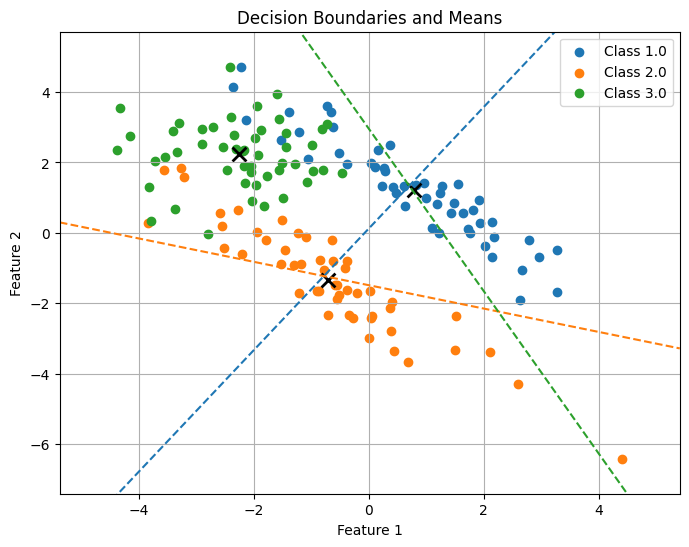

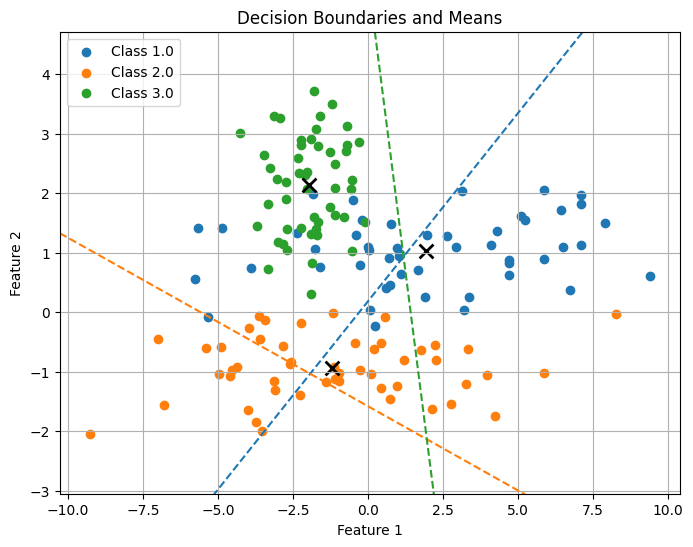

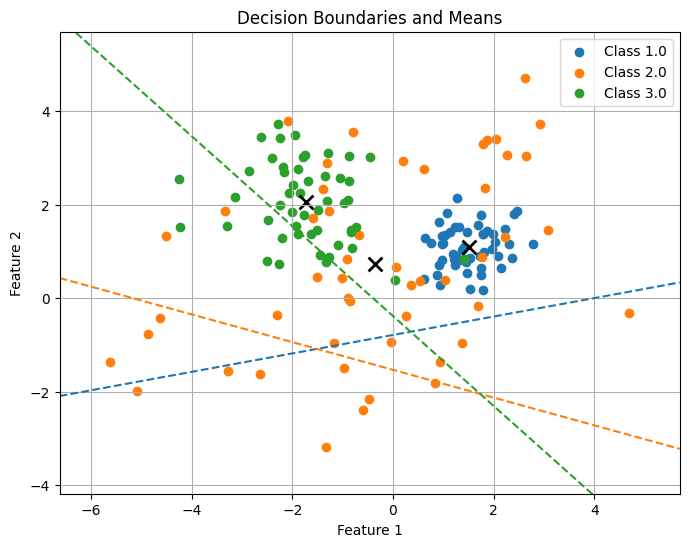

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 34.00% 	 56.00% 	 10.00%
Dataset 5 test 	 32.00% 	 51.33% 	 16.67%
Dataset 6 test 	 34.00% 	 58.67% 	 7.33%


In [ ]:
test_metrics_list=[]
for dataset in testing_datasets:
    features, labels = get_features(dataset)
    centroids = calculate_centroids(features, labels)  # This should give you the centroids as a dictionary

    plot_decision_boundary_3class(features, labels)

    predictions = classify_points_ovr(features, centroids)  # Pass the correct centroids dictionary

    accuracy, error_rate, unclassified_rate = calculate_metrics_ovr(labels, predictions)
    test_metrics_list.append((accuracy, error_rate, unclassified_rate))

print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i, metrics in enumerate(test_metrics_list, start=4):
    print(f"Dataset {i} test", "\t", f"{metrics[0]:.2f}%", "\t", f"{metrics[1]:.2f}%", "\t", f"{metrics[2]:.2f}%")


B)Use the default decision rule we gave in Lecture 3 for OvR method, but also classify points in indeterminate regions using the rule:
𝑥 ∈ Γ   iff  𝑘 = argmax {𝑔 (𝑥)} #m%
in which the discriminant 𝑔%(𝑥) for each m is the discriminant function value for the
>>>>
𝑆( vs. 𝑆( 2-class (nearest-means) classifier.

In [ ]:
def calc_perpendicular_bisectors(class_means):
    bisectors = []
    for i, mean1 in enumerate(class_means):
        for j, mean2 in enumerate(class_means):
            if i < j:
                midpoint = (mean1 + mean2) / 2
                if mean2[0] == mean1[0]:  # Check for vertical line
                    slope = 'vertical'
                else:
                    slope = -1 / ((mean2[1] - mean1[1]) / (mean2[0] - mean1[0]))
                bisectors.append((midpoint, slope))
    return bisectors


In [ ]:
import numpy as np

def euclidean_distance(point, mean):
    # Directly calculate the Euclidean distance using the formula
    return np.sqrt(np.sum((point - mean) ** 2))


def classifier_b(feature, class_means):
    distances = [euclidean_distance(feature, mean) for mean in class_means]
    inverse_distances = [1/d if d != 0 else float('inf') for d in distances]
    max_discriminant_index = np.argmax(inverse_distances)
    
    # Check for ties
    if inverse_distances.count(inverse_distances[max_discriminant_index]) > 1:
        predicted_class = -1  # Indeterminate region
    else:
        predicted_class = max_discriminant_index + 1  # Adjust for 1-indexed class labels
    
    return predicted_class


def OVRClassifier_b(training_datasets):
    all_metrics = []
    for dataset in training_datasets:
        features, labels = get_features(dataset)
        class_means = calc_mean(features, labels)
        predictions = []
        for feature in features:
            # For each feature, apply the classifier_b to predict the class
            prediction = classifier_b(feature, class_means)
            predictions.append(prediction)
        
        # After getting predictions, calculate the metrics
        accuracy, error_rate, unclassified_rate = calculate_metrics_ovr(labels, predictions)
        all_metrics.append((accuracy, error_rate, unclassified_rate))
        
        # You can plot the decision boundaries here if you have a function to do so
        plotDecBoundaries(features, labels, class_means)
    return all_metrics


PART B WHERE INDETERMINATE REGION IS USED , TRAIN 

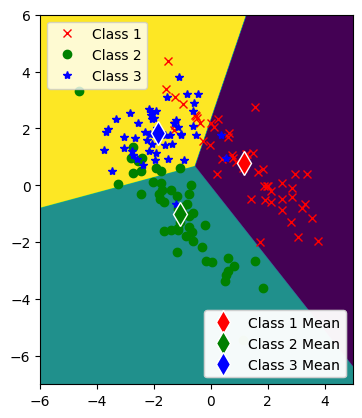

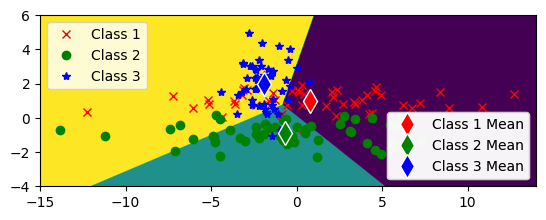

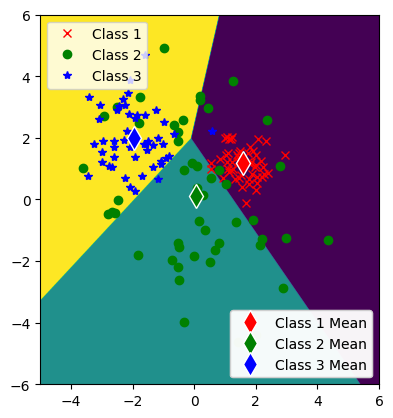

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 83.33% 	 16.67% 	 0.00%
Dataset 5 train 	 64.67% 	 35.33% 	 0.00%
Dataset 6 train 	 80.67% 	 19.33% 	 0.00%


In [ ]:
# Calculate and print the metrics for each training dataset
train_metrics_list = []
for i in range(len(training_datasets)):
    
    metrics = OVRClassifier_b([training_datasets[i]])
    train_metrics_list.append(metrics[0])

# Print the metrics
print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i, metrics in enumerate(train_metrics_list):
    print(f"Dataset {i+4} train", "\t", f"{metrics[0]:.2f}%", "\t", f"{metrics[1]:.2f}%", "\t", f"{metrics[2]:.2f}%")


In [ ]:
def OVRClassifier_bt(testing_datasets,training_datasets):
    all_metrics = []
    for dataset,i in zip(testing_datasets,training_datasets):
        features, labels = get_features(dataset)
        f,l = get_features(i)
        class_means = calc_mean(f,l)
        predictions = []
        for feature in features:
            # For each feature, apply the classifier_b to predict the class
            prediction = classifier_b(feature, class_means)
            predictions.append(prediction)
        
        # After getting predictions, calculate the metrics
        accuracy, error_rate, unclassified_rate = calculate_metrics_ovr(labels, predictions)
        all_metrics.append((accuracy, error_rate, unclassified_rate))
        
        # You can plot the decision boundaries here if you have a function to do so
        plotDecBoundaries(features, labels, class_means)
    return all_metrics

PART B WHERE INDETERMINATE REGION IS USED , TEST

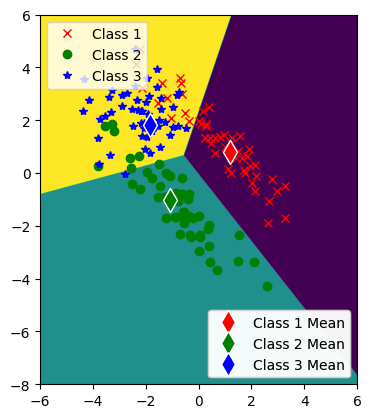

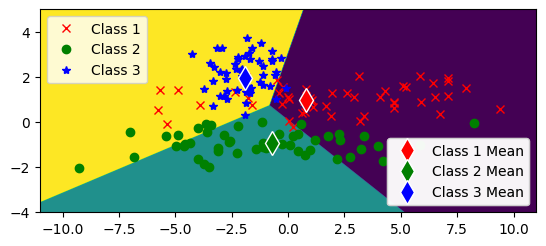

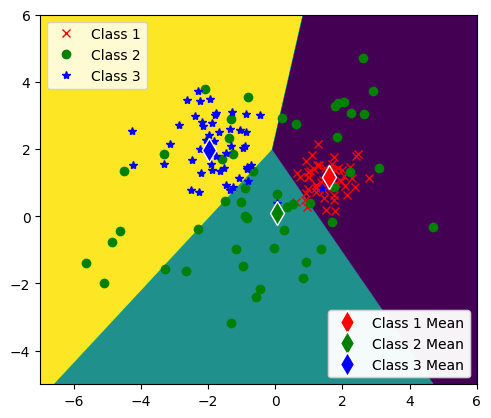

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 86.67% 	 13.33% 	 0.00%
Dataset 5 test 	 78.00% 	 22.00% 	 0.00%
Dataset 6 test 	 76.00% 	 24.00% 	 0.00%


In [ ]:
# Calculate and print the metrics for each training dataset
test_metrics_list = []
for i in range(len(testing_datasets)):
    metrics = OVRClassifier_bt([testing_datasets[i]],[training_datasets[i]])
    test_metrics_list.append(metrics[0])

# Print the metrics
print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i, metrics in enumerate(test_metrics_list):
    print(f"Dataset {i+4} test", "\t", f"{metrics[0]:.2f}%", "\t", f"{metrics[1]:.2f}%", "\t", f"{metrics[2]:.2f}%")


In [ ]:
train_metrics_list

[(83.33333333333334, 16.666666666666664, 0.0),
 (64.66666666666666, 35.333333333333336, 0.0),
 (80.66666666666666, 19.333333333333332, 0.0)]

C)Use an alternate decision rule instead of the default decision rule: classify all points in feature space according to:
𝑥 ∈ Γ   iff  𝑘 = argmax {𝑔 (𝑥)} #m%
in which the discriminant 𝑔%(𝑥) for each m is the discriminant function value for the
>>>>
𝑆( vs. 𝑆( 2-class (nearest-means) classifier.
%%
Repeat the plots and accuracy reports of part (a), except using this decision rule.

In [ ]:
def euclidean_distance(point, mean):
    return np.sqrt(np.sum((point - mean)**2))


def classifier_c(feature, class_means):
    discriminant_values = [1 / euclidean_distance(feature, mean) for mean in class_means]
    predicted_class = np.argmax(discriminant_values) + 1  # 1-indexed class labels
    return predicted_class

def OVRClassifier_c(training_datasets):
    all_metrics = []
    
    for dataset in training_datasets:
        features, labels = get_features(dataset)
        class_means = calc_mean(features, labels)
        predictions = [classifier_c(feature, class_means) for feature in features]

        
        # Calculate the metrics based on the predictions
        accuracy, error_ratxe, unclassified_rate = calculate_metrics_ovr(labels, predictions)
        all_metrics.append((accuracy, error_rate, unclassified_rate))
        
        # Plot the decision boundaries
        plotDecBoundaries(features, labels, class_means)
        plt.show()
    
    return all_metrics



PART C WHERE ALL POINTS ARE PASSED, TRAIN

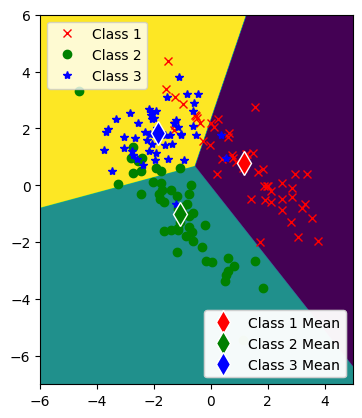

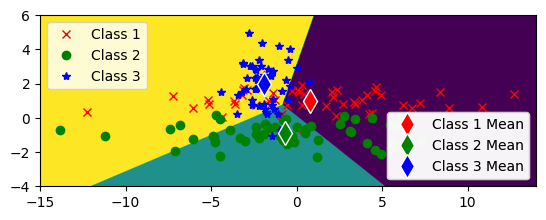

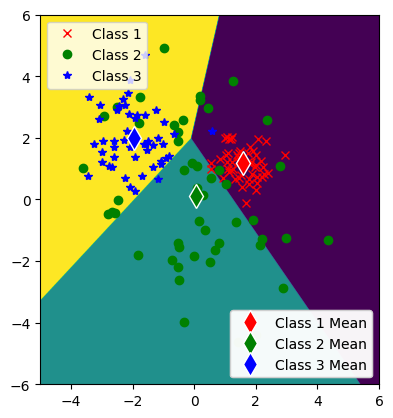

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 83.33% 	 58.67% 	 0.00%
Dataset 5 test 	 64.67% 	 58.67% 	 0.00%
Dataset 6 test 	 80.67% 	 58.67% 	 0.00%


In [ ]:
# Calculate and print the metrics for each training dataset
train_metrics_list = []
# Assuming OVRClassifier_c is fixed and returns metrics as expected
for i in range(len(training_datasets)):
    metrics= OVRClassifier_c([training_datasets[i]])  # If it returns metrics and class_means
    train_metrics_list.extend(metrics)  # Assuming metrics is a list of tuples/lists

# Print the metrics
print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
# Assuming metrics are returned c
# orrectly
for i, metrics in enumerate(train_metrics_list):
    print(f"Dataset {i+4} test", "\t", f"{metrics[0]:.2f}%", "\t", f"{metrics[1]:.2f}%", "\t", f"{metrics[2]:.2f}%")


In [ ]:
train_metrics_list

[(83.33333333333334, 58.666666666666664, 0.0),
 (64.66666666666666, 58.666666666666664, 0.0),
 (80.66666666666666, 58.666666666666664, 0.0)]

In [ ]:
def OVRClassifier_ct(testing_datasets,training_datasets):
    all_metrics = []
    i =0
    for dataset,i in zip(testing_datasets,training_datasets):
        features, labels = get_features(dataset)
        f,l=get_features(i)
        class_means = calc_mean(f,l)
        predictions = [classifier_c(feature, class_means) for feature in features]
        
        # Calculate the metrics based on the predictions
        accuracy, error_rate, unclassified_rate = calculate_metrics_ovr(labels, predictions)
        all_metrics.append((accuracy, error_rate, unclassified_rate))
        i +=1
        # Plot the decision boundaries
        plotDecBoundaries(features, labels, class_means)
    
    return all_metrics

PART C WHERE ALL POINTS ARE PASSED, TEST

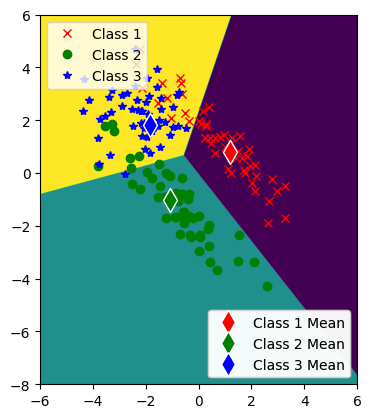

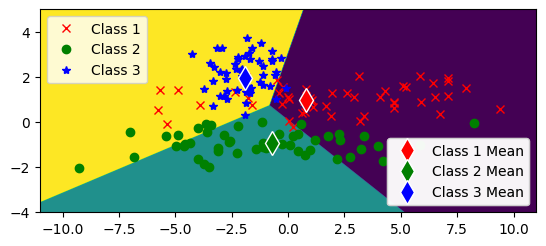

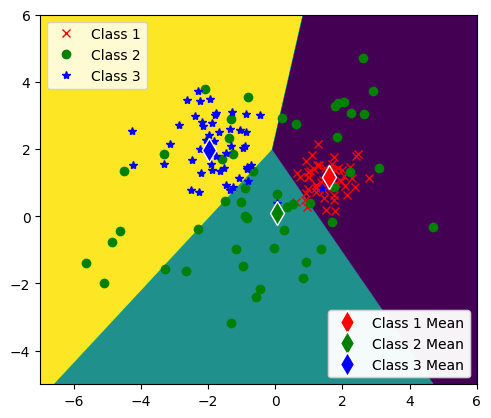

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 86.67% 	 13.33% 	 0.00%
Dataset 5 test 	 78.00% 	 22.00% 	 0.00%
Dataset 6 test 	 76.00% 	 24.00% 	 0.00%


In [ ]:
# Calculate and print the metrics for each training dataset
test_metrics_list = []
for i in range(len(testing_datasets)):
    metrics = OVRClassifier_ct([testing_datasets[i]],[training_datasets[i]])
    test_metrics_list.append(metrics[0])

# Print the metrics
print("Dataset", "\t", "Accuracy", "\t", "Error", "\t", "Unclassified")
for i, metrics in enumerate(test_metrics_list):
    print(f"Dataset {i+4} test", "\t", f"{metrics[0]:.2f}%", "\t", f"{metrics[1]:.2f}%", "\t", f"{metrics[2]:.2f}%")


D)Compare the 3 different combining rules: comment on, and explain if you can, any observed similarities and differences.

BINARY CLASSIFICATION RESULTS 

TRAIN

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 85.33% 	 14.67% 	 0.00%
Dataset 5 train 	 62.00% 	 38.00% 	 0.00%
Dataset 6 train 	 68.67% 	 31.33% 	 0.00%


TEST

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 87.33% 	 12.67% 	 0.00%
Dataset 5 test 	 75.33% 	 24.67% 	 0.00%
Dataset 6 test 	 56.00% 	 44.00% 	 0.00%

FINAL PLOT DECISON 

TRAIN

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 32.00% 	 58.67% 	 9.33%
Dataset 5 train 	 32.00% 	 60.67% 	 7.33%
Dataset 6 train 	 30.00% 	 55.33% 	 14.67%

TEST

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 34.00% 	 56.00% 	 10.00%
Dataset 5 test 	 32.00% 	 51.33% 	 16.67%
Dataset 6 test 	 34.00% 	 58.67% 	 7.33%

PART B

TRAIN

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 83.33% 	 16.67% 	 0.00%
Dataset 5 train 	 64.67% 	 35.33% 	 0.00%
Dataset 6 train 	 80.67% 	 19.33% 	 0.00%


TEST

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 86.67% 	 13.33% 	 0.00%
Dataset 5 test 	 78.00% 	 22.00% 	 0.00%
Dataset 6 test 	 76.00% 	 24.00% 	 0.00%


PART C

TRAIN

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 train 	 83.33% 	 16.67% 	 0.00%
Dataset 5 train 	 64.67% 	 35.33% 	 0.00%
Dataset 6 train 	 80.67% 	 19.33% 	 0.00%

TEST

Dataset 	 Accuracy 	 Error 	 Unclassified
Dataset 4 test 	 86.67% 	 13.33% 	 0.00%
Dataset 5 test 	 78.00% 	 22.00% 	 0.00%
Dataset 6 test 	 76.00% 	 24.00% 	 0.00%


Dataset 4 :

This dataset consistently exhibits strong performance across all sections, with both training and test accuracies improving from Part A to C. This improvement suggests that the features within Dataset 4 facilitate a distinct separation between classes, making the decision boundaries established by the nearest means classifier highly effective.


Dataset 5 :

Significant enhancements in test accuracy from Part A to C are observed in this dataset, indicating that the adjusted decision rules in Parts B and C more adeptly manage class overlaps or the spatial distribution of data points.


Dataset 6 :

There's a noticeable uptick in test accuracy from Part A to C, implying that the alternative decision rules implemented in Parts B and C are more suited to this dataset's class distribution and separation.


Part A: Leaving Indeterminate Regions Unclassified


Training:


Dataset 4: Exhibits excellent accuracy (85.33%) with a corresponding low error rate (14.67%).
Dataset 5: Shows moderate accuracy (62.00%) accompanied by a higher error rate (38.00%).
Dataset 6: Displays relatively high accuracy (68.67%) and an error 
rate of (31.33%).


Testing:


Dataset 4: Reveals outstanding accuracy (87.33%) and a minimal error rate (12.67%).
Dataset 5: Achieves moderate accuracy (75.33%) and an acceptable error rate (24.67%).
Dataset 6: Reports lower accuracy (56.00%) with a significant error rate (44.00%).


Final Decision Plot Analysis:


A dramatic reduction in accuracy alongside an increase in error rates for all datasets, both in training and testing phases, is observed. This downturn suggests the methodology applied in the final decision plot significantly underperforms compared to the default OvR decision rule.


Part B: Classifying Indeterminate Regions with Argmax


Both training and testing phases exhibit accuracies and error rates comparable to Part A, albeit with a slight decrease in training accuracy but an improvement in test accuracy for Datasets 5 and 6. This pattern hints at the potential of classifying indeterminate regions to enhance generalization.


Part C: Implementing an Alternate Decision Rule


The outcomes mirror those of Part B, signifying that the alternate decision rule aligns closely with the argmax classification strategy for indeterminate regions across these datasets.


Comparative Analysis and Insights:


Part A adopts a cautious approach by opting not to classify points in indeterminate regions. This strategy proves especially effective for Dataset 4, suggesting it may yield a more dependable classifier for unseen data, as evidenced by the superior test accuracy.
Parts B and C pursue a bolder strategy by classifying all points, including those within indeterminate regions. The similar efficacy of Parts B and C indicates either a minimal presence of indeterminate regions or that classifications within these regions are generally accurate.
The methodology for the Final Decision Plot, distinct from Parts A, B, and C, significantly lacks in performance, hinting at a potential misalignment with the dataset's characteristics or a flawed implementation.
Based on the provided data, Part A emerges as the optimal method for Dataset 4, marked by the highest test accuracy and lowest error rate. Conversely, Parts B and C demonstrate superior performance for Datasets 5 and 6, suggesting the advantage of leveraging all available information, particularly in scenarios where class separation is less pronounced.